# 1. Definição do Problema

O mercado de aluguéis em Nova York é altamente competitivo, com um estoque limitado de propriedades disponíveis. As oportunidades no mercado podem mudar rapidamente, e os proprietários frequentemente têm requisitos específicos que precisam ser atendidos.

Neste projeto, realizaremos uma análise exploratória dos dados de uma imobiliária concorrente e testaremos modelos preditivos para desenvolver uma estratégia de precificação eficaz.

O objetivo principal é criar um modelo de previsão de preços para o distrito de Manhattan e especificamente para o bairro Midtown. Avaliaremos o desempenho desse modelo utilizando métricas de avaliação apropriadas para o problema, garantindo assim sua eficácia e precisão.

Este projeto visa fornecer insights valiosos para a estratégia de precificação de aluguéis temporários em uma das regiões mais dinâmicas e exigentes do mercado imobiliário de Nova York.

# 2. Extração dos Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('/home/leticia/aluguel_temporario.csv', encoding= 'UTF-8')

In [3]:
display(df)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
#Para facilitar o entendimento e padronizar as nomenclaturas vamos alterar o nome de algumas colunas
df.rename(columns={'bairro_group' : 'distrito',
                        'price' : 'preco',
                        'calculado_host_listings_count' : 'listagem_host',
                         'disponibilidade_365' : 'disponibilidade'}, inplace=True)

In [5]:
df.head()

,id,nome,host_id,host_name,distrito,bairro,latitude,longitude,room_type,preco,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,listagem_host,disponibilidade
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [6]:
df['preco'].describe()

count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: preco, dtype: float64

# 3. Preparação dos Dados

In [7]:
#verificando se existem dados nullos
df.isnull().sum()

id                       0
nome                    16
host_id                  0
host_name               21
distrito                 0
bairro                   0
latitude                 0
longitude                0
room_type                0
preco                    0
minimo_noites            0
numero_de_reviews        0
ultima_review        10052
reviews_por_mes      10052
listagem_host            0
disponibilidade          0
dtype: int64

In [8]:
#verificando colunas duplicadas
df.duplicated().sum()

0

In [9]:
#removendo as linhas NaN das colunas nome e host_nome
df = df.dropna(subset=['nome', 'host_name'])

In [10]:
#convertendo o campo ultima_review de string para datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'], errors='coerce')

In [11]:
#Preenchendo os campos que estão NaN em ultima_review com uma data padrão, pois são muitos dados faltantes
df['ultima_review'].fillna(df['ultima_review'].min(), inplace=True)

In [12]:
#preenchendo os dados que estão NaN em reviews_por_mes com 0
df['reviews_por_mes'].fillna(0, inplace=True)

In [13]:
#verificando se existem linhas com caracteres especiais
linhas_com_caracteres_especiais = df[df['nome'].str.contains(r'[^\x00-\x7F]+', regex=True)]
print(linhas_com_caracteres_especiais)

             id                                               nome    host_id  \
103       24143  Williamsburg—Steps To Subway, Private Bath&Bal...      97219   
131       30031                   NYC artists’ loft with roof deck     129352   
201       54158                The Institute—Heart of Williamsburg      10889   
208       55467                Private Garden Apt • New Renovation     260709   
319       76761     Eveland the Place to Stay & Enjoy a 5-⭐️ 2bdrm     118971   
...         ...                                                ...        ...   
48839  36452965    ❥❥NYC Apt: 4min/subway, 25m/city, 20m/LGA,JFK❥❥   63272360   
48842  36453642     ☆  HUGE, SUNLIT Room - 3 min walk from Train !   53966115   
48848  36455579                          Studio in Manhattan(独立出入)  257261595   
48856  36457832      ❥NYC Apt: 4min/subway, 25m/city, 20m/LGA,JFK❥   63272360   
48859  36468386  纽约罗岛Roosevelt Island整租或合租 窗外美景 设施全 家具新 到曼哈顿方便 ...  228268650   

            host_name   dis

In [14]:
#removendo os caracteres especiais
import re
df['nome'] = df['nome'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

In [15]:
#remoção dos emojis
import emoji
df['nome'] = df['nome'].apply(lambda x: emoji.demojize(x))

In [16]:
#Verificando se existem dados negativos na base
colunas = ['preco', 'minimo_noites', 'numero_de_reviews', 'listagem_host']
linhas_negativas = df[(df[colunas] < 0).any(axis=1)]
print(linhas_negativas)

Empty DataFrame
Columns: [id, nome, host_id, host_name, distrito, bairro, latitude, longitude, room_type, preco, minimo_noites, numero_de_reviews, ultima_review, reviews_por_mes, listagem_host, disponibilidade]
Index: []


In [17]:
#eliminando as linhas que tem preço zerado - eram 11
df = df[df['preco'] != 0]

In [18]:
df.shape

(48846, 16)

# 4. Exploração / Visualização dos Dados

In [19]:
aluguel = df[['id', 'nome', 'distrito', 'bairro', 'preco']].groupby(['id']).sum()
aluguel = aluguel.sort_values(by='preco', ascending=False)
display(aluguel)

,nome,distrito,bairro,preco
id,,,,
22436899,1-BR Lincoln Center,Manhattan,Upper West Side,10000
7003697,Furnished room in Astoria apartment,Queens,Astoria,10000
13894339,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,10000
4737930,Spanish Harlem Apt,Manhattan,East Harlem,9999
31340283,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,9999
...,...,...,...,...
1620248,Large furnished 2 bedrooms- - 30 days Minimum,Manhattan,East Village,10
28270998,"Charming, bright and brand new Bed-Stuy home",Brooklyn,Bedford-Stuyvesant,10
27316669,Bronx Apart,Bronx,Highbridge,10


In [20]:
np.unique(df['room_type'], return_counts=True)

(array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object),
 array([25391, 22298,  1157]))

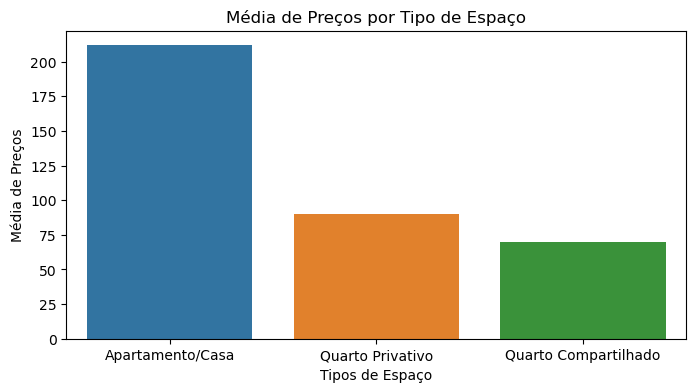

In [21]:
#calculando a media de precod por tipo de quarto
media_preco_tipo = df.groupby('room_type')['preco'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='room_type', y='preco', data=media_preco_tipo)
plt.title('Média de Preços por Tipo de Espaço')
plt.xlabel('Tipos de Espaço')
plt.ylabel('Média de Preços')
plt.xticks([0,1,2], ['Apartamento/Casa', 'Quarto Privativo', 'Quarto Compartilhado'])
plt.show()

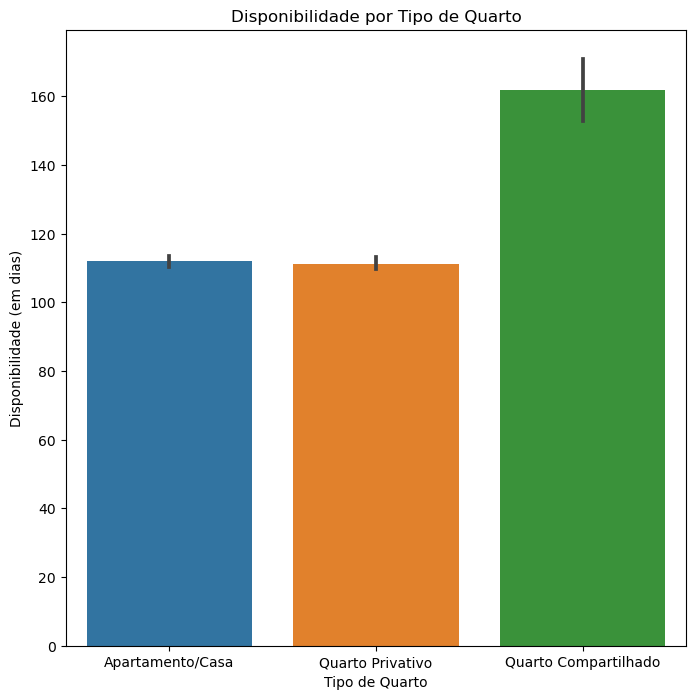

In [22]:
# verificando a disponibilidade x tipo de quarto

plt.figure(figsize=(8,8))
sns.barplot(x='room_type', y='disponibilidade', data=df)
plt.title('Disponibilidade por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Disponibilidade (em dias)')
plt.xticks([0,1,2], ['Apartamento/Casa', 'Quarto Privativo', 'Quarto Compartilhado']);

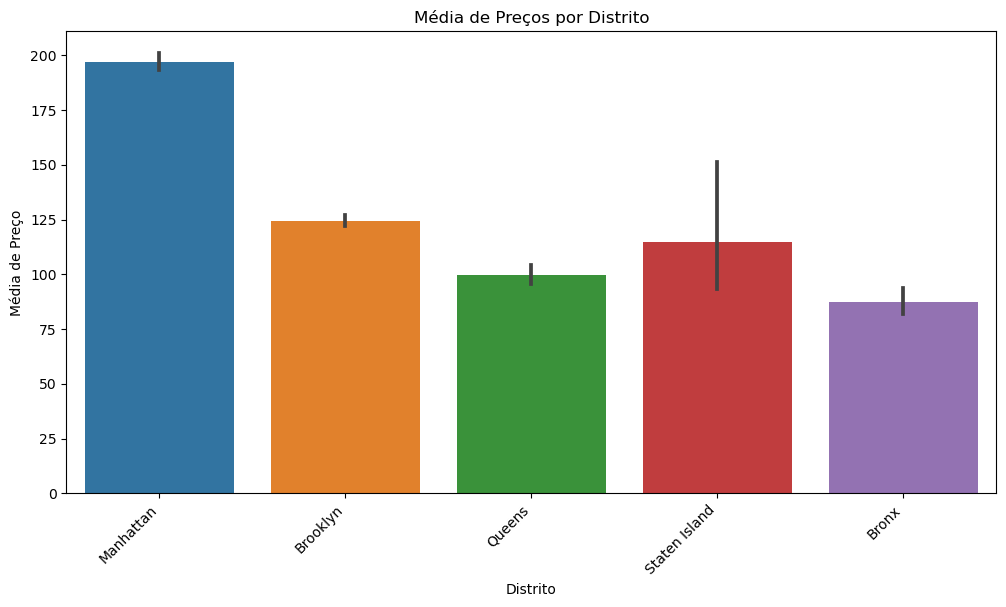

In [23]:
#Verificando a media de preços por distrito
plt.figure(figsize=(12, 6))
sns.barplot(x='distrito', y='preco', data=df)
plt.title('Média de Preços por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Média de Preço')
plt.xticks(rotation=45, ha='right') 
plt.show()

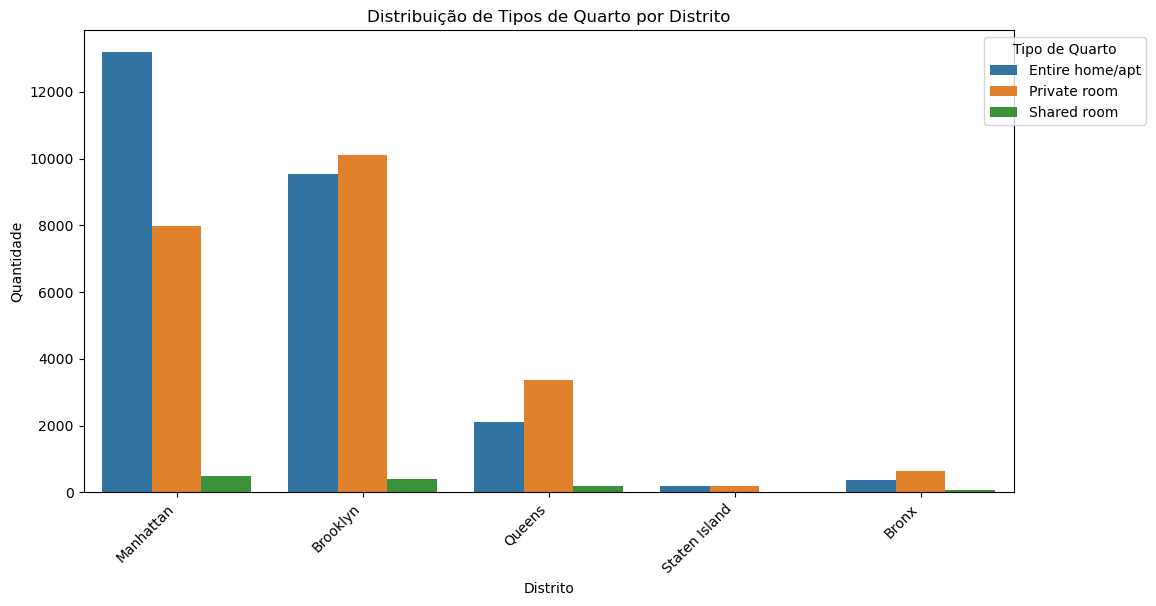

In [24]:
#Verificando a distribuição de tipos de habitação por distrito
plt.figure(figsize=(12, 6))
sns.countplot(x='distrito', hue='room_type', data=df)
plt.title('Distribuição de Tipos de Quarto por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Quarto', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

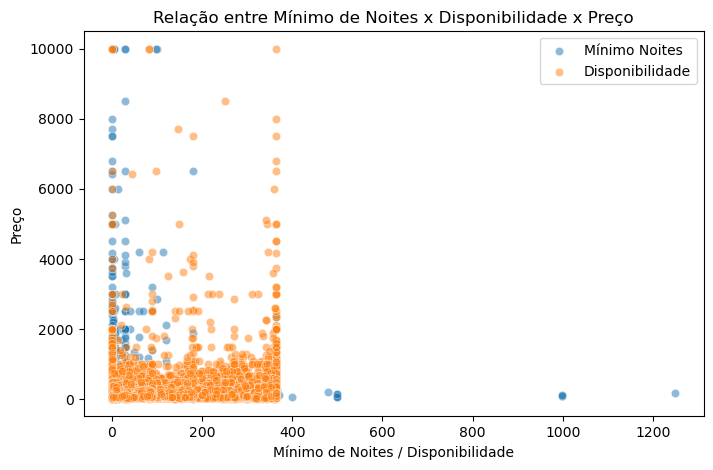

In [25]:
colunas = df[['minimo_noites', 'disponibilidade', 'preco']]

# Scatter Plot comparando relação entre mínimo de noites, disponibilidade e preço
plt.figure(figsize=(8, 5))
sns.scatterplot(x='minimo_noites', y='preco', data=colunas, alpha=0.5, label='Mínimo Noites')
sns.scatterplot(x='disponibilidade', y='preco', data=colunas, alpha=0.5, label='Disponibilidade')
plt.xlabel('Mínimo de Noites / Disponibilidade')
plt.ylabel('Preço')
plt.title('Relação entre Mínimo de Noites x Disponibilidade x Preço')
plt.legend()
plt.show()

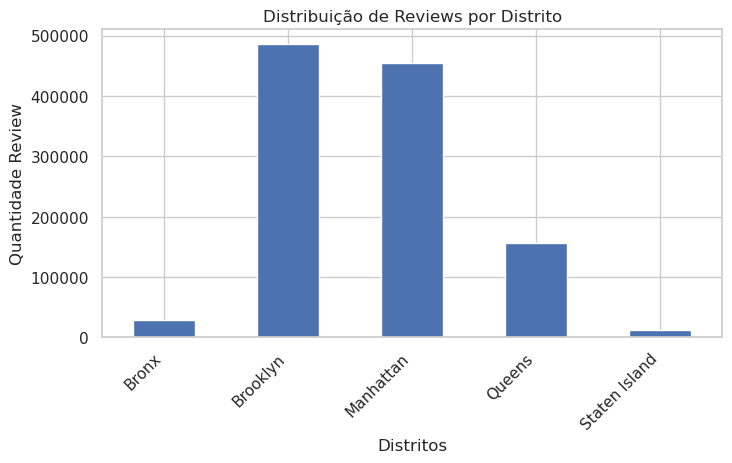

In [26]:
#Verificando a distribuição de reviews por distrito
sns.set_theme(style="whitegrid")

reviews_por_distrito = df.groupby('distrito')['numero_de_reviews'].sum()

plt.figure(figsize=(8,4))
reviews_por_distrito.plot(kind='bar')
plt.title('Distribuição de Reviews por Distrito')
plt.xlabel('Distritos')
plt.ylabel('Quantidade Review')
plt.xticks(rotation=45, ha='right')
plt.show()

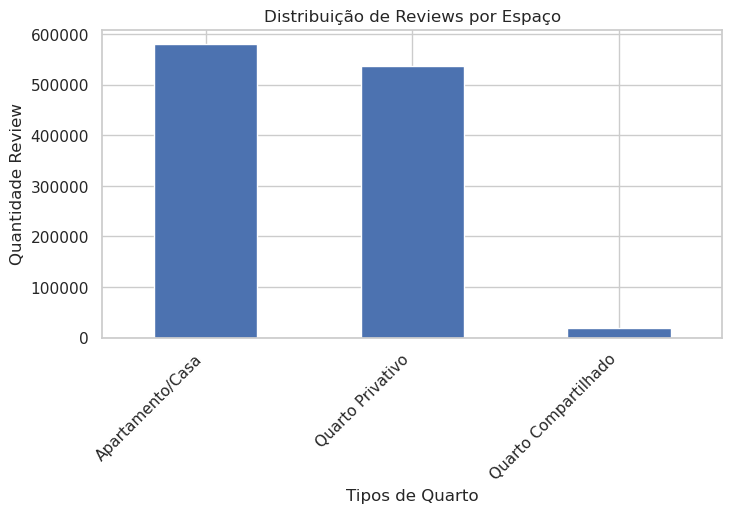

In [27]:
#Verificando a distribuição de tipos de quarto e reviews
reviews_por_espaco = df.groupby('room_type')['numero_de_reviews'].sum()

plt.figure(figsize=(8,4))
reviews_por_espaco.plot(kind='bar')
plt.title('Distribuição de Reviews por Espaço')
plt.xlabel('Tipos de Quarto')
plt.ylabel('Quantidade Review')
plt.xticks([0,1,2], ['Apartamento/Casa', 'Quarto Privativo', 'Quarto Compartilhado'], rotation=45, ha='right')
plt.show()

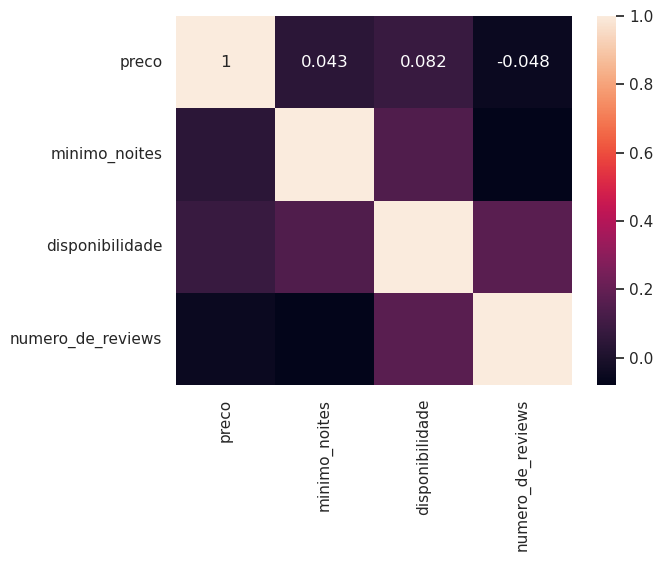

In [28]:
sns.set_theme()

correlacao = df[['preco', 'minimo_noites', 'disponibilidade', 'numero_de_reviews']].corr()
sns.heatmap(correlacao, annot=True)
plt.show()

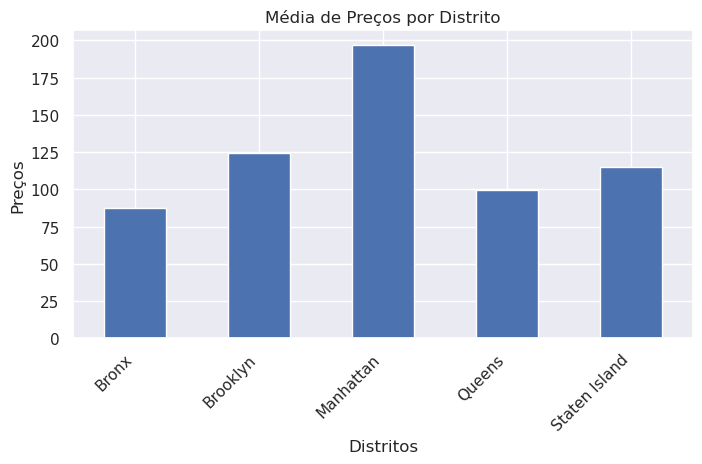

--> O aluguel mais caro em cada distrito |  distrito
Bronx             2500
Brooklyn         10000
Manhattan        10000
Queens           10000
Staten Island     5000
Name: preco, dtype: int64
--> O aluguel mais barato em cada distrito |  distrito
Bronx            10
Brooklyn         10
Manhattan        10
Queens           10
Staten Island    13
Name: preco, dtype: int64


In [29]:
#Verificando a media de preço por bairro
media_por_distrito = df.groupby('distrito')['preco'].mean()

plt.figure(figsize=(8,4))
media_por_distrito.plot(kind='bar')
plt.title('Média de Preços por Distrito')
plt.xlabel('Distritos')
plt.ylabel('Preços')
plt.xticks(rotation=45, ha='right')
plt.show()

#Verificando aluguel mais caro por bairro
aluguel_mais_caro_por_distrito = df.groupby('distrito')['preco'].max()
print('--> O aluguel mais caro em cada distrito | ', aluguel_mais_caro_por_distrito)

#Verificando aluguel mais barato por bairro
aluguel_mais_barato_por_distrito = df.groupby('distrito')['preco'].min()
print('--> O aluguel mais barato em cada distrito | ', aluguel_mais_barato_por_distrito)

(-0.5, 799.5, 399.5, -0.5)

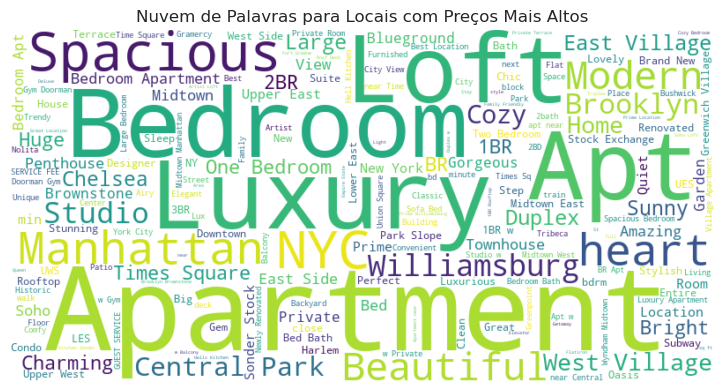

In [30]:
#Verificando quais palavras mais aparecem nos anuncios para locais com preços mais altos

from wordcloud import WordCloud


limite_preco_alto = df['preco'].quantile(0.80)


locais_preco_alto = df[df['preco'] >= limite_preco_alto]['nome'].astype(str).dropna()
locais_preco_baixo = df[df['preco'] < limite_preco_alto]['nome'].astype(str).dropna()

wordcloud_alto = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(locais_preco_alto))
wordcloud_baixo = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(locais_preco_baixo))

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_alto, interpolation='bilinear')
plt.title('Nuvem de Palavras para Locais com Preços Mais Altos')
plt.axis('off')

# Insights

--> Média de Preços por Tipo de Aluguel:
Os apartamentos e casas apresentam a média mais alta de preços de aluguel, seguidos pelos quartos privativos. Os preços mais acessíveis são encontrados em quartos compartilhados.

--> Disponibilidade e Preços por Tipo de Espaço:
Quartos compartilhados oferecem maior disponibilidade de espaços, com preços geralmente mais baixos em comparação com outros tipos de aluguel.

--> Variação de Preços por Distrito:
Manhattan é o distrito com a média de preços mais alta, enquanto os aluguéis mais acessíveis são encontrados no Bronx.

--> Distribuição de Espaços por Distrito:
Manhattan e Brooklyn lideram em disponibilidade de espaços, com predominância de casas e apartamentos. Staten Island apresenta a menor quantidade de espaços disponíveis.

--> Tipos de Espaços Mais Procurados:
Apartamentos e casas são os tipos de espaços mais demandados entre os locatários.

--> Palavras-chave Mais Comuns nos Anúncios:
Os termos mais frequentes nos anúncios incluem: apartamento, espaçoso, loft, luxuoso, bonito e moderno.

Em termos de investimento, o lugar mais adequado para compra seria em Manhattan.

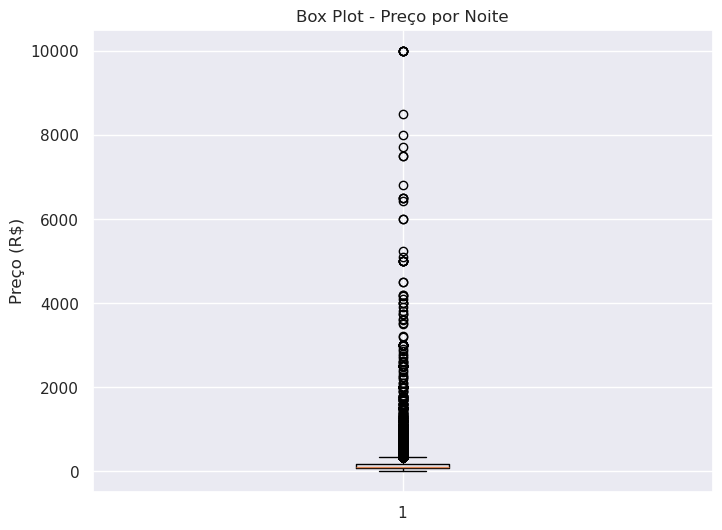

In [31]:
# Box plot para verificar se exitem outliers na coluna de preço
plt.figure(figsize=(8, 6))
plt.boxplot(df['preco'])
plt.title('Box Plot - Preço por Noite')
plt.ylabel('Preço (R$)')
plt.show()

Foram identificados outliers na base e optei por fazer a remoção deles, visando desenvolver o modelo de machine learning, uma vez que a presença destes dados provoca alteração na curva de regressao linear, consequentemente afeta de forma negativa as predições dados por este modelo.
Desta forma, através da remoção destes dados conseguimos obeter uma maior acurácia do modelo.

In [32]:
# Calcula o primeiro quartil (Q1)
Q1 = np.percentile(df['preco'], 25, interpolation='midpoint')

# Calcula o terceiro quartil (Q3)
Q3 = np.percentile(df['preco'], 75, interpolation='midpoint')

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Calcula os limites superior e inferior para identificar outliers
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Filtra os dados para remover outliers
df = df[(df['preco'] >= lower_limit) & (df['preco'] <= upper_limit)]

# Cria uma cópia dos dados limpos
df = df.copy()

# Target Encoding

In [33]:
#LabelEncoder converte variáveis categóricas em representações numericas
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoder_nome = LabelEncoder()
label_encoder_host_name = LabelEncoder()
label_encoder_distrito = LabelEncoder()
label_encoder_bairro = LabelEncoder()
label_encoder_room_type = LabelEncoder()

In [35]:
df['nome'] = label_encoder_nome.fit_transform(df['nome'])
df['host_name'] = label_encoder_host_name.fit_transform(df['host_name'])
df['distrito'] = label_encoder_distrito.fit_transform(df['distrito'])
df['bairro'] = label_encoder_bairro.fit_transform(df['bairro'])
df['room_type'] = label_encoder_room_type.fit_transform(df['room_type'])

In [36]:
# Divisão das variáveis independentes e target.
X = df.drop(['preco', 'latitude', 'longitude', 'ultima_review'], axis=1) 
y = df['preco']

In [37]:
#escalonamento dos dados para que o algortimo nao atribua uma maior importancia a alguns dados e outros nao
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [38]:
# Divisao dos dados de treino e teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [40]:
#testando os modelos escolhidos
modelos = {
    'Regressão Linear': LinearRegression(),
    'Árvore de Decisão': DecisionTreeRegressor(),
    'Ridge': Ridge(alpha=10.0),
    'Lasso': Lasso(),
    'Floresta Aleatória': RandomForestRegressor(max_depth=20, n_estimators=300),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [41]:
# Treinando e avaliando cada modelo
for name, modelo in modelos.items():
    modelo.fit(X_treino, y_treino)
    previsao = modelo.predict(X_teste)
    rmse = np.sqrt(mean_squared_error(y_teste, previsao))
    
    print(f"Modelo: {name}")
    print(f"RMSE: {rmse}\n")


Modelo: Regressão Linear
RMSE: 0.7745949286010929

Modelo: Árvore de Decisão
RMSE: 0.9379527498950482

Modelo: Ridge
RMSE: 0.7745951276072173

Modelo: Lasso
RMSE: 1.0023565693283794



/tmp/ipykernel_6063/3497411499.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_treino, y_treino)


Modelo: Floresta Aleatória
RMSE: 0.6607753020543313



/home/leticia/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Modelo: Gradient Boosting
RMSE: 0.6806290510221823



In [42]:
xgb_model = XGBRegressor()
xgb_model.fit(X_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
previsao_xgb = xgb_model.predict(X_teste)
rmse = np.sqrt(mean_squared_error(y_teste, previsao_xgb))
    
print(f"Modelo: {name}")
print(f"RMSE: {rmse}\n")

Modelo: Gradient Boosting
RMSE: 0.6520700349187819



In [44]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
mlp_model.fit(X_treino, y_treino)

/home/leticia/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(100, 50))

In [45]:
previsao_mlp = mlp_model.predict(X_teste)
rmse = np.sqrt(mean_squared_error(y_teste, previsao_mlp))
    
print(f"Modelo: {name}")
print(f"RMSE: {rmse}\n")

Modelo: Gradient Boosting
RMSE: 0.7302874177823263



# Contextualização dos Resultados:

A métrica RMSE (Root Mean Square Error) é uma medida de quão bem cada modelo está performando na tarefa de predição dos dados de aluguel em NY. Fiz algumas considerações sobre os resultados obtidos:

Interpretação do RMSE:
O RMSE é uma medida de erro que indica a raiz quadrada da média dos quadrados dos erros entre os valores preditos e os valores reais. Um RMSE menor indica um modelo que está mais próximo dos valores reais, enquanto um RMSE maior indica um modelo com mais erros de predição.

Análise dos Resultados:
Comparando os valores de RMSE:
A Regressão Linear e Ridge apresentam resultados semelhantes, o que indica que esses modelos estão performando de forma consistente.
A Árvore de Decisão tem um RMSE um pouco mais alto em comparação com os modelos lineares.
O Lasso parece ter o RMSE mais alto entre os modelos testados, o que pode sugerir que ele não está performando tão bem quanto os outros modelos para esses dados específicos.
A Floresta Aleatória e o Gradient Boosting apresentam os menores valores de RMSE, o que indica que esses modelos estão produzindo predições mais precisas em comparação com os outros modelos testados.

Em resumo, os modelos com RMSE mais baixo (como Floresta Aleatória e Gradient Boosting) parecem estar oferecendo as melhores predições com base nos dados e na configuração do problema.